In [32]:
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
data = pd.read_csv("../Data/HistoricalCryptos/DOGE.csv")

In [93]:
data["returns"] = (data["close"]-data["close"].shift(1))/data["close"].shift(1)
#clip the returns to remove outliers
data['returns'] = data['returns'].clip(-0.25,0.25)
ethReturns = data.filter(['date', 'returns'])

In [94]:
# Ensure 'date' column is in datetime format
ethReturns['date'] = pd.to_datetime(ethReturns['date'])
# Set 'date' as the index
ethReturns.set_index('date', inplace=True)

Text(0.5, 1.0, 'ETH-USD returns')

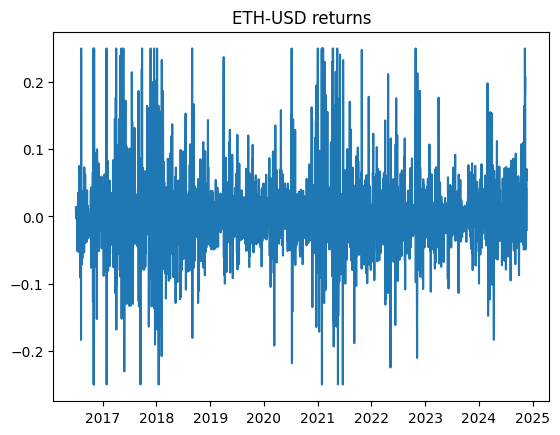

In [95]:
plt.plot(ethReturns.index, ethReturns['returns'])
plt.title('ETH-USD returns')

In [96]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  # Set range [-1, 1]

In [97]:
ethReturns['scaled_returns'] = scaler.fit_transform(ethReturns[['returns']])

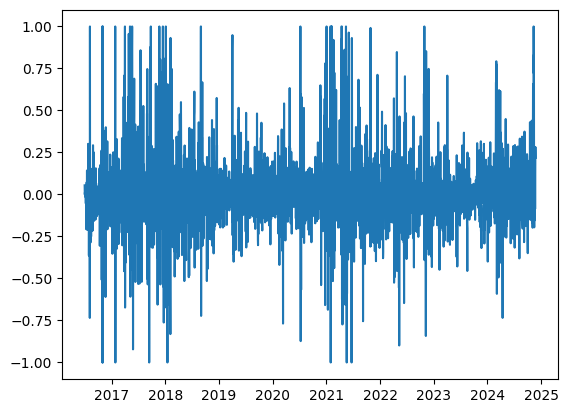

In [98]:
plt.plot(ethReturns.index, ethReturns['scaled_returns'])

In [99]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to returns
ethReturns['standardized_returns'] = scaler.fit_transform(ethReturns[['returns']])

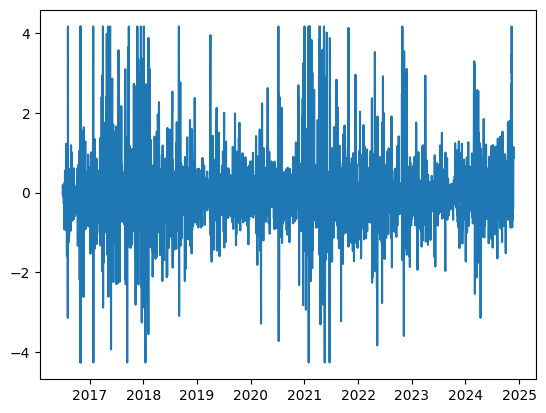

In [100]:
plt.plot(ethReturns.index, ethReturns['standardized_returns'])

In [101]:
from statsmodels.tsa.stattools import adfuller

In [102]:
adfuller(data['returns'].dropna())

(np.float64(-12.189064318422103),
 np.float64(1.2983323165269062e-22),
 15,
 3051,
 {'1%': np.float64(-3.4324951361310974),
  '5%': np.float64(-2.862487785002662),
  '10%': np.float64(-2.567274529885855)},
 np.float64(-8535.043431390137))

(array([  13.,   19.,   58.,  260., 1193., 1139.,  224.,   70.,   44.,
          47.]),
 array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25]),
 <BarContainer object of 10 artists>)

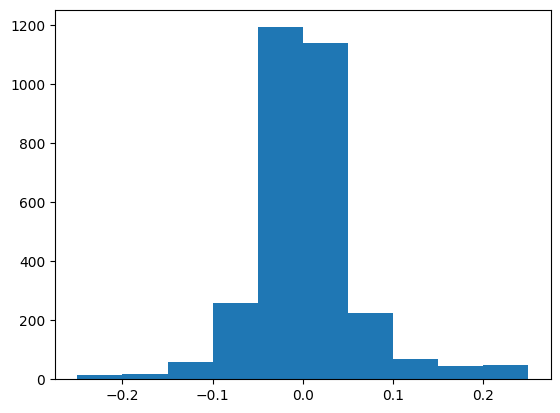

In [103]:
plt.hist(data['returns'])

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
data.head(5)

,ticker,date,open,high,low,close,returns
0,DOGE,2016-07-01,0.000290,0.000294,0.000290,0.000294,NaN
1,DOGE,2016-07-02,0.000294,0.000298,0.000280,0.000298,0.013605
2,DOGE,2016-07-03,0.000298,0.000298,0.000290,0.000298,0.000000
3,DOGE,2016-07-04,0.000298,0.000299,0.000285,0.000299,0.003356
4,DOGE,2016-07-05,0.000299,0.000300,0.000299,0.000300,0.003344


In [106]:
X = data['returns'].shift(1)
y = data['returns']
X = X.dropna()
y = y.loc[X.index]  # Align y to the indices of X
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [107]:
# Reshape X_train and X_test to be 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [108]:
# Example: Train a simple model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
# Predict and evaluate
y_pred = model.predict(X_test)

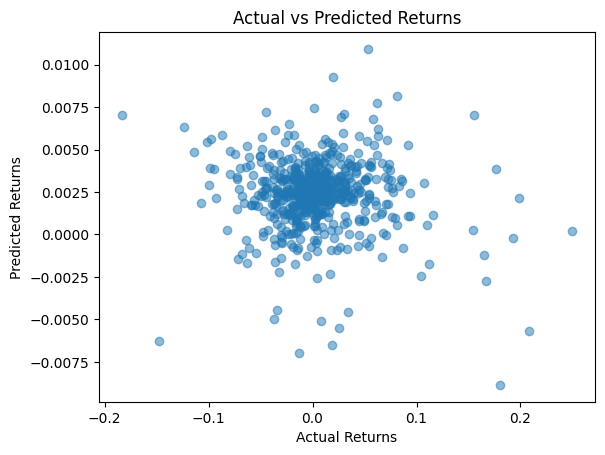

In [110]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted Returns")
plt.show()

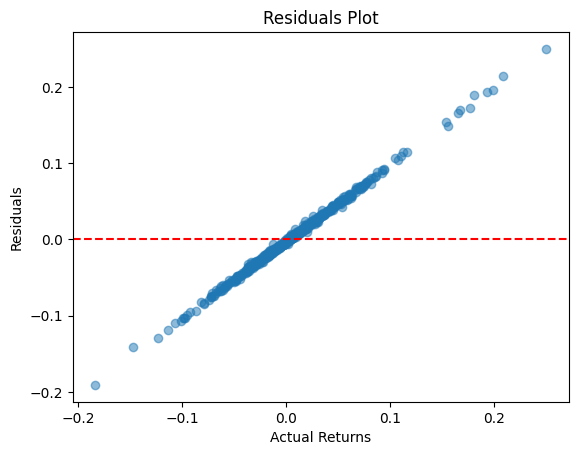

In [113]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

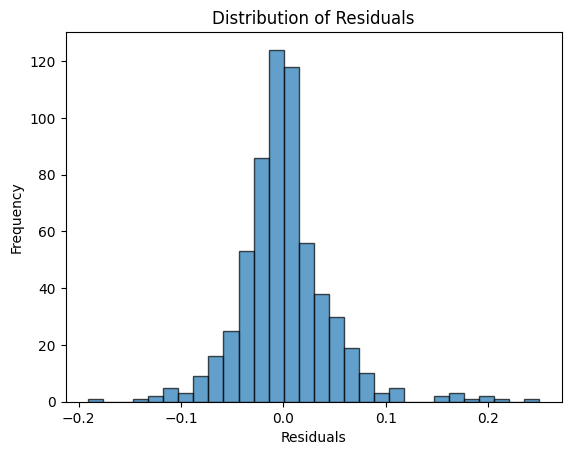

In [112]:
# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()